In [35]:
import os
import absl.logging
import tensorflow as tf

# suppress tf warning
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
absl.logging.set_verbosity(absl.logging.ERROR)

In [46]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the model
hub_model = hub.load("https://www.kaggle.com/models/google/circularnet/TensorFlow2/1/1")
hub_model_fn = hub_model.signatures["serving_default"]

In [77]:
# preprocess image
def preprocess_image(image_path):
    input_size = (1024, 512)  # height, width

    # Load image
    image = cv2.imread(image_path)
    # to RBG
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # resize
    image_resized = cv2.resize(image, input_size, interpolation=cv2.INTER_AREA)
    # normalize
    image_normalized = image_resized / 255.0
    # dtype is float32
    image_tensor = tf.convert_to_tensor(image_normalized, dtype=tf.float32)
    # batch dimension
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    return image, image_tensor

# input image
original_image, image_tensor = preprocess_image("/content/image_2.png")

In [82]:
# predict
results = hub_model_fn(inputs=image_tensor)

# results
num_detections = int(results["num_detections"].numpy()[0])
detection_scores = results["detection_scores"].numpy()[0]
detection_classes = results["detection_classes"].numpy()[0].astype(int)
detection_boxes = results["detection_boxes"].numpy()[0]
print(results)

{'detection_classes': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>, 'image_info': <tf.Tensor: shape=(1, 4, 2), dtype=float32, numpy=
array([[[5.120e+02, 1.024e+03],
        [5.120e+02, 1.024e+03],
        [1.000e+00, 1.000e+00],
        [0.000e+00, 0.000e+00]]], dtype=float32)>, 'detection_masks': <tf.Tensor: shape=(1, 100, 28, 28), dtype=float32, numpy=
array([[[[0.57538325, 0.6236913 , 0.6660147 , ..., 0.5382748 ,
          0.35855046, 0.52632487],
         [0.5579788 , 0.6124694 , 0.65368074, ..., 0.74880534,
          0.7079612 , 0.8075849 ],
         [0.50531167, 0.619109  , 0.6627935 , ..., 0.54990464,
          0.30177876, 0.4

Image shape: (1920, 1080, 3)


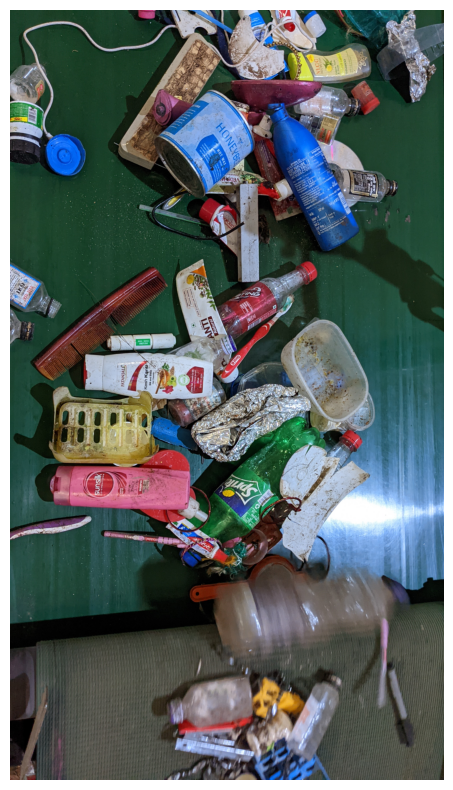

In [79]:
def visualize_detections(image, boxes, scores, classes, threshold=0.5):

    # Debug: Print image shape
    print(f"Image shape: {image.shape}")

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    # loop through all boxes
    for i in range(len(boxes)):
        if scores[i] >= threshold:
            # extract box coordinates
            ymin, xmin, ymax, xmax = boxes[i]

            # Debug: normalized box values
            print(f"Normalized box {i}: ymin={ymin}, xmin={xmin}, ymax={ymax}, xmax={xmax}")

            # scale bounding box
            xmin_scaled, xmax_scaled = xmin * image.shape[1], xmax * image.shape[1]
            ymin_scaled, ymax_scaled = ymin * image.shape[0], ymax * image.shape[0]

            # Debug: original image box values
            print(f"Scaled box {i}: ymin={ymin_scaled}, xmin={xmin_scaled}, ymax={ymax_scaled}, xmax={xmax_scaled}")

            # Ensure scaled values are within image bounds
            xmin_scaled = max(0, min(image.shape[1], xmin_scaled))
            xmax_scaled = max(0, min(image.shape[1], xmax_scaled))
            ymin_scaled = max(0, min(image.shape[0], ymin_scaled))
            ymax_scaled = max(0, min(image.shape[0], ymax_scaled))

            # Draw rectangle around the detected object
            rect = plt.Rectangle(
                (xmin_scaled, ymin_scaled),
                xmax_scaled - xmin_scaled,
                ymax_scaled - ymin_scaled,
                fill=False,
                edgecolor='red',
                linewidth=2
            )
            ax.add_patch(rect)

            # Add label and confidence score
            label = f"Class {classes[i]}: {scores[i]:.2f}"
            ax.text(
                xmin_scaled,
                ymin_scaled,
                label,
                fontsize=10,
                color='blue',
                bbox=dict(facecolor='yellow', alpha=0.5)
            )

    plt.axis('off')
    plt.show()


# Visualize with a score threshold of 0.5
visualize_detections(original_image, detection_boxes, detection_scores, detection_classes, threshold=0.5)

In [67]:
# Check unique classes in the output
unique_classes = set(results["detection_classes"].numpy()[0].astype(int))
print(f"Unique classes detected: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")

Unique classes detected: {1}
Number of unique classes: 1


In [80]:
print(results["detection_classes"])
print(results["detection_scores"])

tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]], shape=(1, 100), dtype=int32)
tf.Tensor(
[[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]], shape=(1, 100), dtype=float32)


# download model

# labels

In [ ]:
## bottle -> 6: 0.98 (PLASTIC, INORGANIC)
## papitas -> 8: 1.00 (FIBER, ORGANIC)

In [ ]:
# Mapping of material label ids to string name and human readable string label.
# Source: U.S. Environmental Protection Agency (http://shortn/_ktDlFMfXm3)
item {
id: 1
name: "inorganic_waste"
display_name: "Soil, bits of concrete and stones"
}
item {
id: 2
name: "textiles"
display_name: "Discarded clothing, carpet, sheets and towels"
}
item {
id: 3
name: "rubber_and_leather"
display_name:
  "Rubber and leather products such as clothing footwear, tires, gaskets and "
  "furniture"
}
item {
id: 4
name: "wood"
display_name:
  "Wood products such as cabinets, furniture, and packaging like crates and "
  "pallets"
}
item {
id: 5
name: "food"
display_name:
  "Residential, commercial (supermarkets, food whoesale, restaurants, hotels, "
  "sports venues) and insitutional (hospitals, offices, universities, schools, "
  "food banks) food waste"
}
item {
id: 6
name: "plastics"
display_name:
  "Plastic products such as bags, sacks, wraps, cups, bottles, jugs, "
  "containers, lids, utensils, medical devices and household items"
}
item {
id: 7
name: "yard_trimmings"
display_name:
  "Grass, leaves and tree and brush trimmings from residential, institutional "
  "and commercial sources"
}
item {
id: 8
name: "fiber"
display_name:
  "Cardboard products such as office papers, newspapers, tissue paper, paper "
  "plates, cups, corrugated boxes, milk cartons, and bags and sacks"
}
item {
id: 9
name: "glass"
display_name:
  "Glass products such as beer and soft drink bottles, wine and liquor "
  "bottles, and bottles or jars for food, cosmetics and other products"
}
item {
id: 10
name: "metals"
display_name:
  "Ferrous (iron and steel), non-ferrous (lead, copper and zinc) and aluminum "
  "products such as containers, packaging, appliances, batteries, electronics "
  "and furniture"
}